# libraries

In [ ]:
!pip install git+https://github.com/pydata/xarray.git
import xarray as xr
!pip install bambi

  Cloning https://github.com/pydata/xarray.git to /tmp/pip-req-build-kurx85zw
  Running command git clone --filter=blob:none --quiet https://github.com/pydata/xarray.git /tmp/pip-req-build-kurx85zw
  Resolved https://github.com/pydata/xarray.git to commit 7551a7a4fcad82a27b3701cfa0af85f74404a45c
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for xarray: filename=xarray-2025.4.1.dev19+g7551a7a4-py3-none-any.whl size=1304219 sha256=49803cdd75594c37390b2446ec336b3e351591d7e6e759676f43291daa40f689
  Stored in directory: /tmp/pip-ephem-wheel-cache-fwqz_uke/wheels/15/f9/46/ac58ec95d7761bd0b92f54d99c5d132719866f63745c3702ed
Successfully built xarray
  Attempting uninstall: xarray
    Found existing installation: xarray 2025.3.1
    Uninstalling xarray-2025.3.1:
      Successfully uninstalled xarray-2025.3.1
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.2/109.2 kB 4.3 MB/s eta 0:00:00
   ━

In [ ]:
!pip install preliz

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.4/519.4 kB 7.9 MB/s eta 0:00:00


In [ ]:
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pymc as pm
import seaborn as sns

In [ ]:
import torch
import numpy as np
from torch import nn
import pandas as pd
import sklearn
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# **Where was that on the Spotify charts? 🤔**



For this project I want to try to find where on the spotify charts these popular songs from 2022 debued. I'll be using numerical charitaristics like danceability, energy, bpm, etc. I chose this contest becaues I love music and recognize most of these songs (That's why I chose 2022's most popular songs rather than the most popular songs in history.) ****DISCLAIMER: I HAVE NO IDEA WHAT I AM DOING* ***

In [ ]:
url="https://raw.githubusercontent.com/rithisenthil/DSF_Submission_Files/refs/heads/main/U9DataUPDATED%20-%20Sheet1.csv"
data = pd.read_csv(url).dropna() #.dropna() to get rid of empty cells that might haunt me later on
data.rename(columns={"danceability_%": "danceability", "valence_%": "valence", "energy_%": "energy", "acousticness_%": "acousticness", "instrumentalness_%": "instrumentalness", "liveness_%": "liveness", "speechiness_%": "speechiness"}, inplace=True)

data

track_name      artist(s)_name  artist_count  \
0    Seven (feat. Latto) (Explicit Ver.)    Latto, Jung Kook             2   
1                                   LALA         Myke Towers             1   
2                                vampire      Olivia Rodrigo             1   
3                           Cruel Summer        Taylor Swift             1   
4                         WHERE SHE GOES           Bad Bunny             1   
..                                   ...                 ...           ...   
948                         My Mind & Me        Selena Gomez             1   
949            Bigger Than The Whole Sky        Taylor Swift             1   
950                 A Veces (feat. Feid)  Feid, Paulo Londra             2   
951                        En La De Ella  Feid, Sech, Jhayco             3   
952                                Alone           Burna Boy             1   

     released_year  released_month  released_day  in_spotify_playlists  \
0             2023               7            14                   553   
1             2023               3            23                  1474   
2             2023               6            30                  1397   
3             2019               8            23                  7858   
4             2023               5            18                  3133   
..             ...             ...           ...                   ...   
948           2022              11             3                   953   
949           2022              10            21                  1180   
950           2022              11             3                   573   
951           2022              10            20                  1320   
952           2022              11             4                   782   

     in_spotify_charts    streams  in_apple_playlists  ...  bpm key   mode  \
0                  147  141381703                  43  ...  125   B  Major   
1                   48  133716286                  48  ...   92  C#  Major   
2                  113  140003974                  94  ...  138   F  Major   
3                  100  800840817                 116  ...  170   A  Major   
4                   50  303236322                  84  ...  144   A  Minor   
..                 ...        ...                 ...  ...  ...  ..    ...   
948                  0   91473363                  61  ...  144   A  Major   
949                  0  121871870                   4  ...  166  F#  Major   
950                  0   73513683                   2  ...   92  C#  Major   
951                  0  133895612                  29  ...   97  C#  Major   
952                  2   96007391                  27  ...   90   E  Minor   

    danceability  valence energy acousticness  instrumentalness  liveness  \
0             80       89     83           31                 0         8   
1             71       61     74            7                 0        10   
2             51       32     53           17                 0        31   
3             55       58     72           11                 0        11   
4             65       23     80           14                63        11   
..           ...      ...    ...          ...               ...       ...   
948           60       24     39           57                 0         8   
949           42        7     24           83                 1        12   
950           80       81     67            4                 0         8   
951           82       67     77            8                 0        12   
952           61       32     67           15                 0        11   

     speechiness  
0              4  
1              4  
2              6  
3             15  
4              6  
..           ...  
948            3  
949            6  
950            6  
951            5  
952            5  

[817 rows x 24 columns]

Since there is so much interaction and influence going on in the data, I'm going to narrrow my analysis down from every single relationship between every single combination of variable to only the relationships between chart placment and featuresof the music such as speechiness, acoustiness, danceability, instrumentalness, etc. I will also be looking at interactions between the features themselves. I'm mostly looking for interesting connections. Stuff other than "oh! as bpm goes up, tempo goes up!"

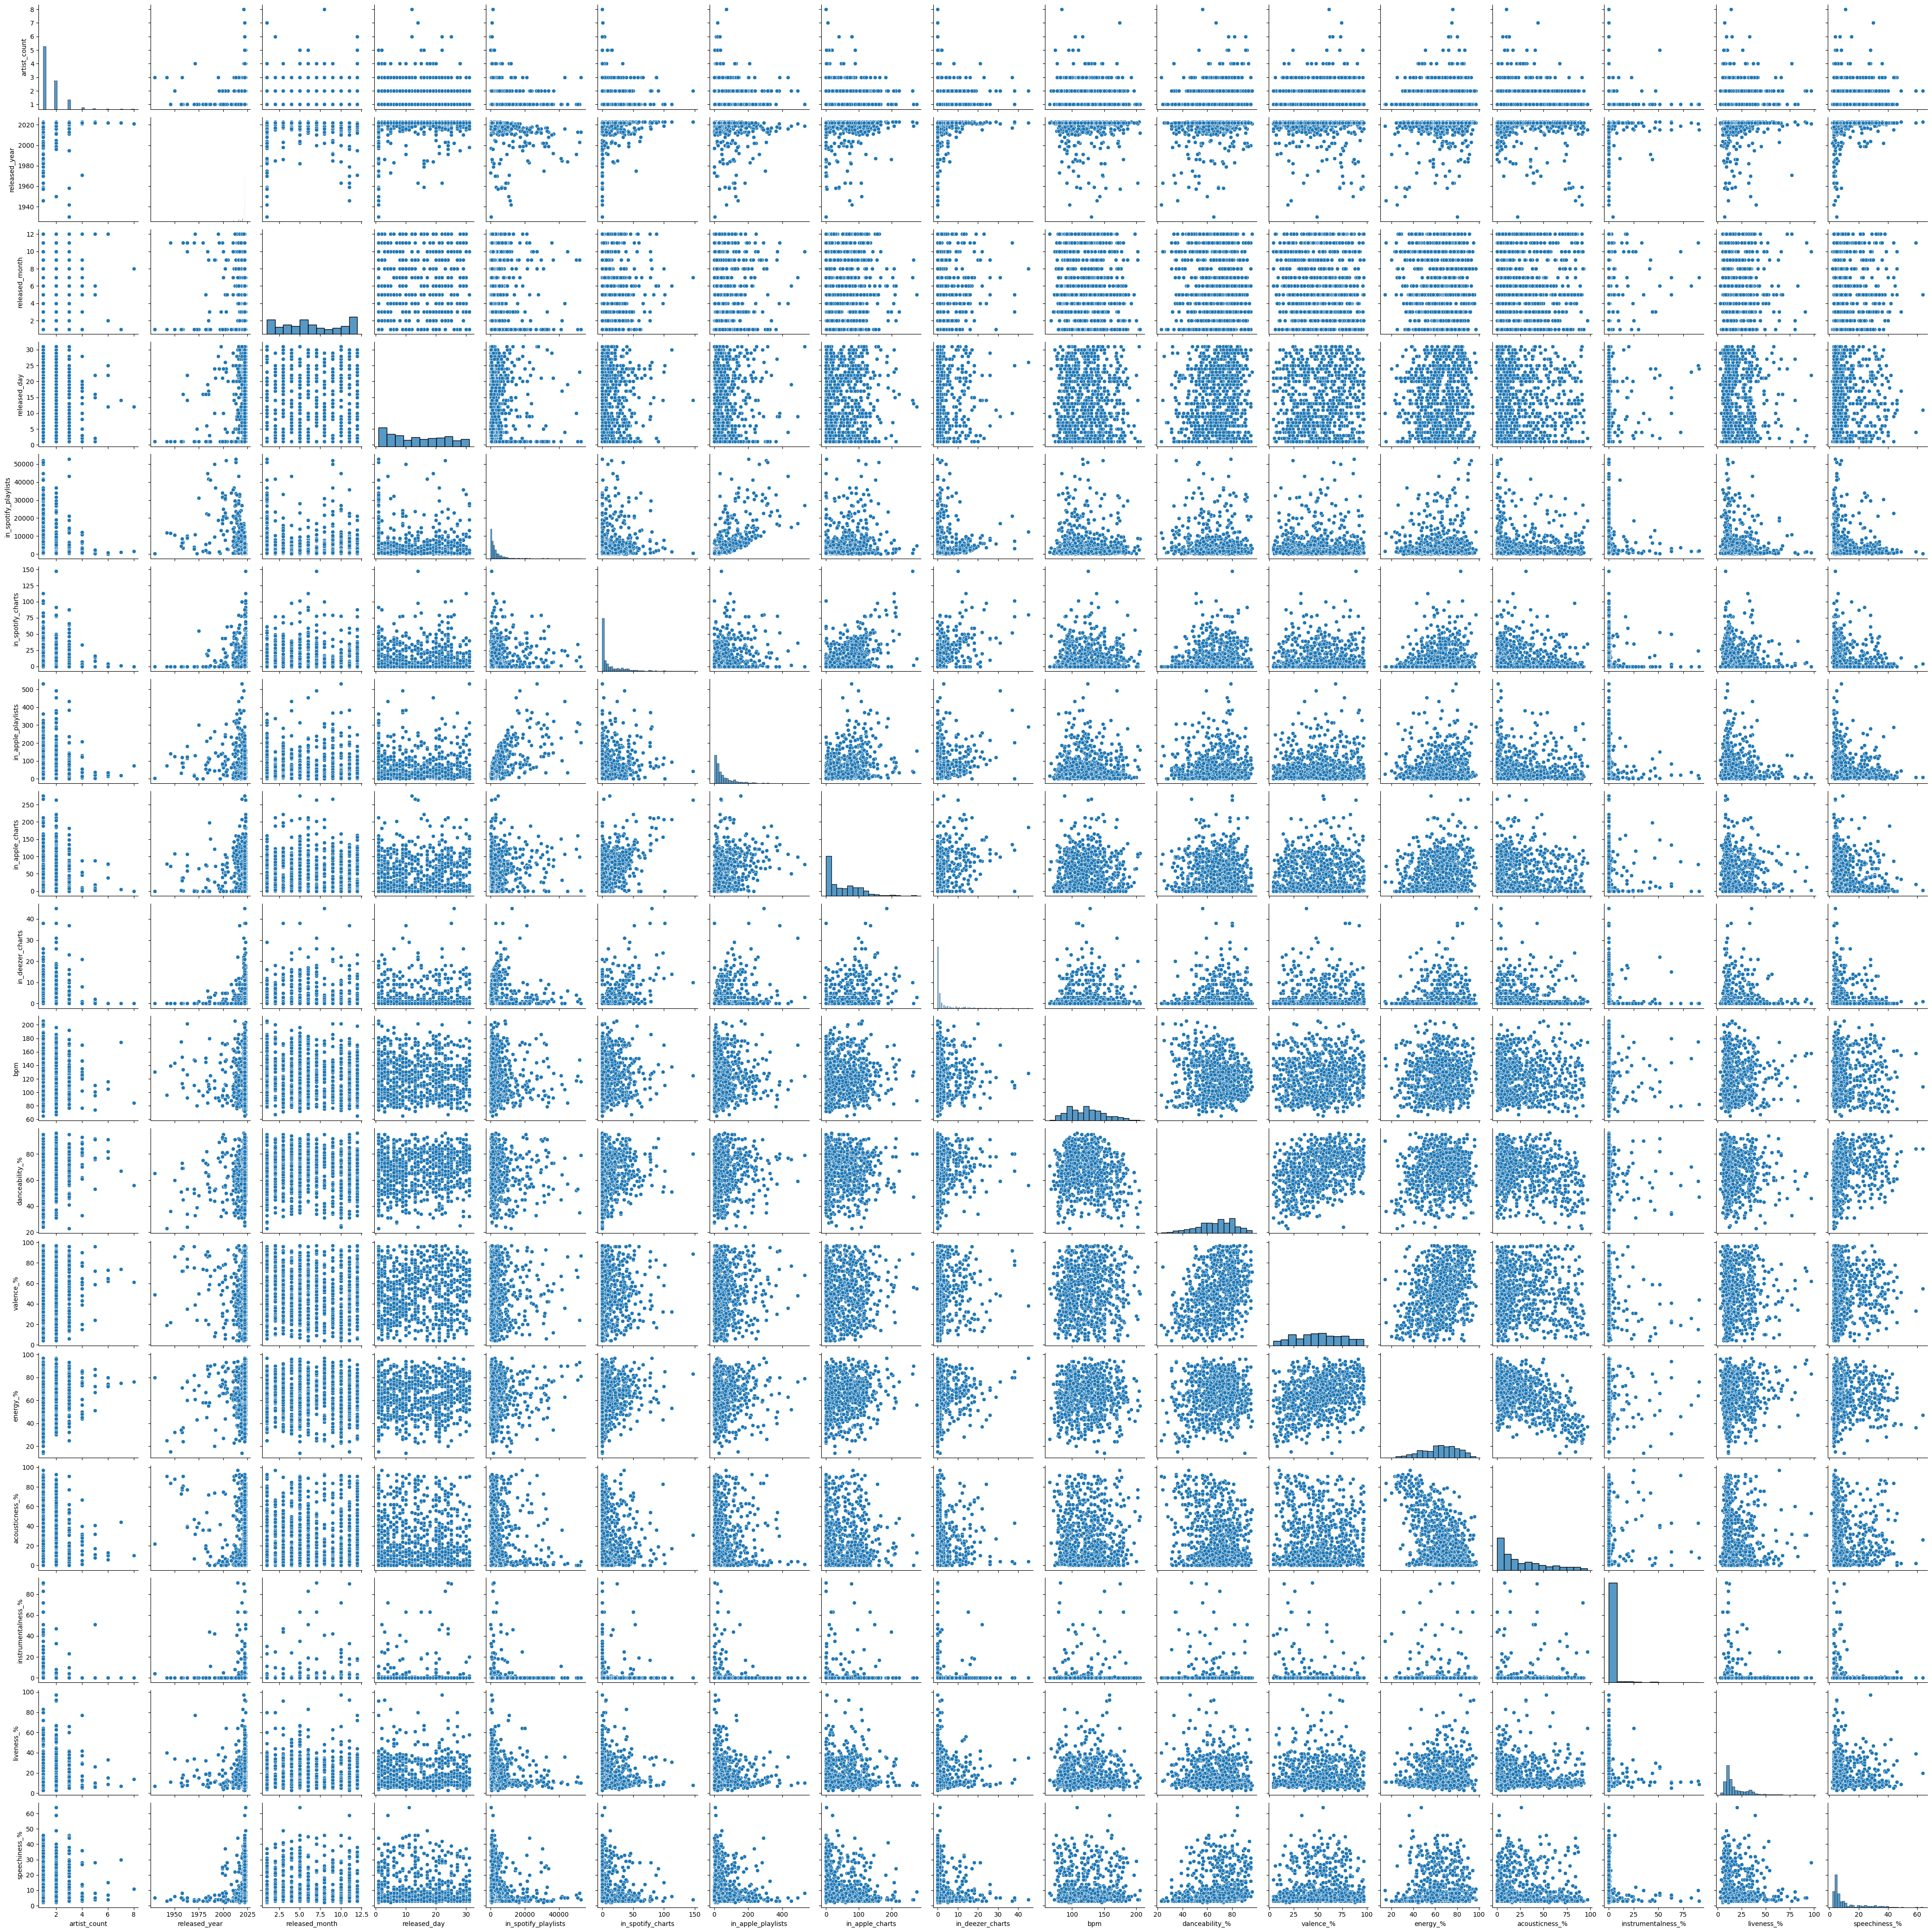

In [ ]:
sns.pairplot(data)

# **Single Input Models**

Im starting with a few simple models to just get the hang of things and practice reading outputs.

**Version 1**

For this first model, I am only using bpm to predict chart placement. Pretty straight-forward, I just copied andpated form the notes.

In [ ]:
i = data.bpm.to_numpy()
input = torch.from_numpy(i)
o = data.in_spotify_charts.to_numpy()
output = torch.from_numpy(o)


X = input.unsqueeze(dim=1) #use bpm as a predictor
y = output.unsqueeze(dim=1) #spotify chart placement is the estimand, the thing we're predicting.

In [ ]:
# Scale the input using standardization
scaler = StandardScaler()
input_scaled = scaler.fit_transform(
    input.reshape(-1, 1) #makes it a column vector
    )

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    input_scaled, output, test_size=0.2,
)

# Convert to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32)

<ipython-input-22-582382b078f6>:14: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_train = torch.tensor(y_train, dtype=torch.float32)
<ipython-input-22-582382b078f6>:16: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_test = torch.tensor(y_test, dtype=torch.float32)


In [ ]:
# Two layer nn with nn.Sequential
model_v1 = nn.Sequential(
    #our input is a vector, so 1 diminsion.
    nn.Linear(in_features=1, out_features=32,),
    nn.RReLU(),

    #hidden layer with 32 nodes
    nn.Linear(in_features=32, out_features=16, ),
    nn.RReLU(),

    #moves to hidden layer with 16 nodes
    nn.Linear(in_features=16, out_features=8, ),
    nn.RReLU(),

    #hidden layer with 8 nodes
    nn.Linear(in_features=8, out_features=4, ),
    nn.RReLU(),

    #hidden layer with 4 nodes
    nn.Linear(in_features=4, out_features=1, ),
    #outputs a vector of predicted weights
)

In [ ]:

# Create a loss function
loss_fn = nn.MSELoss()

# Create an optimizer; SGD is stochastic gradient decent
optimizer = torch.optim.SGD(params=model_v1.parameters(),
                            lr=0.0001) #this is how fast it optimizes; smaller is slower, but more consistent

In [ ]:
# Set the number of epochs; this is how many times we update our model
epochs = 2000

for epoch in range(epochs):
    ### Training

    #this allows our matrices to update
    model_v1.train()

    # 1. Forward pass; makes predictions
    y_pred = model_v1(X_train)

    # 2. Calculate loss; how bad were our predictions?
    loss = loss_fn(y_pred.squeeze(), y_train)

    # 3. Optimizer zero grad; resets how we change our model
    optimizer.zero_grad()

    # 4. Loss backwards; determines how to change our weights matrix
    loss.backward()

    # 5. Optimizer step; changes our weights matrix based on .backward()
    optimizer.step()

    ### Testing
    model_v1.eval() #forces our matrices to stay the same
    with torch.inference_mode():
      # 1. Forward pass; makes predictions, but with test data
      test_pred = model_v1(X_test)
      # 2. Calculate the loss, but with test data
      test_loss = loss_fn(test_pred, y_test)

    # Print out what's happening
    if epoch % 200 == 0: #prints every 200 epochs
        print(f"Epoch: {epoch} | Train loss: {loss:.5f}, Test loss: {test_loss:.5f}")

/usr/local/lib/python3.11/dist-packages/torch/nn/modules/loss.py:610: UserWarning: Using a target size (torch.Size([164])) that is different to the input size (torch.Size([164, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch: 0 | Train loss: 470.46899, Test loss: 555.44196
Epoch: 200 | Train loss: 459.67242, Test loss: 543.18213
Epoch: 400 | Train loss: 448.62265, Test loss: 530.55688
Epoch: 600 | Train loss: 433.90820, Test loss: 513.50391
Epoch: 800 | Train loss: 376.46622, Test loss: 443.35419
Epoch: 1000 | Train loss: 338.67047, Test loss: 387.99704
Epoch: 1200 | Train loss: 337.99451, Test loss: 387.57761
Epoch: 1400 | Train loss: 337.75482, Test loss: 387.33887
Epoch: 1600 | Train loss: 337.12738, Test loss: 387.15860
Epoch: 1800 | Train loss: 337.19022, Test loss: 387.03119


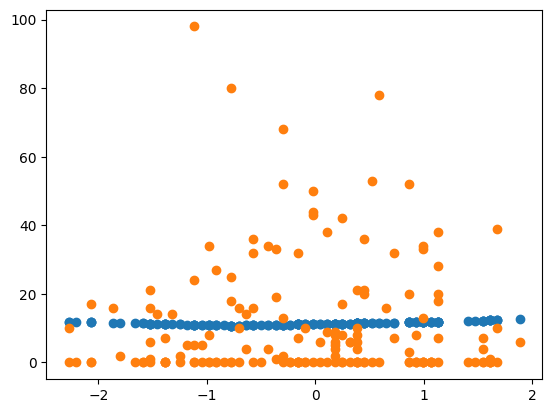

In [ ]:
# Turn on evaluation mode
model_v1.eval()

# Make predictions (inference)
with torch.inference_mode():
    y_preds = model_v1(X_test)


plt.scatter(X_test.detach().numpy(),y_preds.detach().numpy())
plt.scatter(X_test.detach().numpy(),y_test)

Cool, I am seeing a reduction in both Train loss and Test loss, so I am happy. But I'm getting a little nervous, I don't see much correlation between these two variables... I'm going to try a couple more times just to see if I can get a better interaction and more loss differences.

**Version 2**

In [ ]:
i = data.danceability.to_numpy()
input = torch.from_numpy(i)
o = data.in_spotify_charts.to_numpy()
output = torch.from_numpy(o)


X = input.unsqueeze(dim=1) #use height as a predictor
y = output.unsqueeze(dim=1) #weight is the estimand, the thing we're predicting.

In [ ]:
# Scale the height using standardization
scaler = StandardScaler()
input_scaled = scaler.fit_transform(
    input.reshape(-1, 1) #makes it a column vector
    )

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    input_scaled, output, test_size=0.2,
)

# Convert to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32)

<ipython-input-29-582382b078f6>:14: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_train = torch.tensor(y_train, dtype=torch.float32)
<ipython-input-29-582382b078f6>:16: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_test = torch.tensor(y_test, dtype=torch.float32)


In [ ]:
# Two layer nn with nn.Sequential
model_v2 = nn.Sequential(
    #our input is a vector, so 1 diminsion.
    nn.Linear(in_features=1, out_features=32,),
    nn.RReLU(),

    #hidden layer with 32 nodes
    nn.Linear(in_features=32, out_features=16, ),
    nn.RReLU(),

    #moves to hidden layer with 16 nodes
    nn.Linear(in_features=16, out_features=8, ),
    nn.RReLU(),

    #hidden layer with 8 nodes
    nn.Linear(in_features=8, out_features=4, ),
    nn.RReLU(),

    #hidden layer with 4 nodes
    nn.Linear(in_features=4, out_features=1, ),
    #outputs a vector of predicted weights
)

In [ ]:
# Create a loss function
loss_fn = nn.MSELoss()

# Create an optimizer; SGD is stochastic gradient decent
optimizer = torch.optim.SGD(params=model_v2.parameters(),
                            lr=0.0001) #this is how fast it optimizes; smaller is slower, but more consistent

In [ ]:
# Set the number of epochs; this is how many times we update our model
epochs = 2000

for epoch in range(epochs):
    ### Training

    #this allows our matrices to update
    model_v2.train()

    # 1. Forward pass; makes predictions
    y_pred = model_v2(X_train)

    # 2. Calculate loss; how bad were our predictions?
    loss = loss_fn(y_pred.squeeze(), y_train)

    # 3. Optimizer zero grad; resets how we change our model
    optimizer.zero_grad()

    # 4. Loss backwards; determines how to change our weights matrix
    loss.backward()

    # 5. Optimizer step; changes our weights matrix based on .backward()
    optimizer.step()

    ### Testing
    model_v2.eval() #forces our matrices to stay the same
    with torch.inference_mode():
      # 1. Forward pass; makes predictions, but with test data
      test_pred = model_v2(X_test)
      # 2. Calculate the loss, but with test data
      test_loss = loss_fn(test_pred, y_test)

    # Print out what's happening
    if epoch % 200 == 0: #prints every 200 epochs
        print(f"Epoch: {epoch} | Train loss: {loss:.5f}, Test loss: {test_loss:.5f}")

/usr/local/lib/python3.11/dist-packages/torch/nn/modules/loss.py:610: UserWarning: Using a target size (torch.Size([164])) that is different to the input size (torch.Size([164, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch: 0 | Train loss: 494.53586, Test loss: 419.25238
Epoch: 200 | Train loss: 467.84250, Test loss: 394.72464
Epoch: 400 | Train loss: 360.05182, Test loss: 305.31760
Epoch: 600 | Train loss: 357.30823, Test loss: 303.43164
Epoch: 800 | Train loss: 356.97104, Test loss: 302.95251
Epoch: 1000 | Train loss: 356.74304, Test loss: 302.82947
Epoch: 1200 | Train loss: 356.59641, Test loss: 302.78409
Epoch: 1400 | Train loss: 356.27753, Test loss: 302.76334
Epoch: 1600 | Train loss: 356.03925, Test loss: 302.74649
Epoch: 1800 | Train loss: 355.91226, Test loss: 302.74817


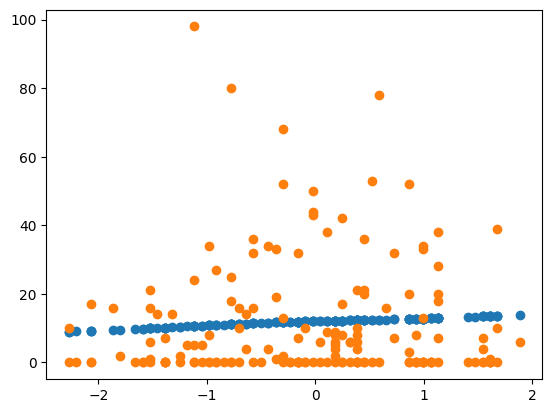

In [ ]:
# Turn on evaluation mode
model_v2.eval()

# Make predictions (inference)
with torch.inference_mode():
    y_preds = model_v2(X_test)


plt.scatter(X_test.detach().numpy(),y_preds.detach().numpy())
plt.scatter(X_test.detach().numpy(),y_test)

Uh oh... There isn't a correlation here either, It's a little late now because I have 2 days left to work on this. I think I am just going to try to salvage this data and try to find any connections anaywhere... Darn you Kaggle!!! Other than that, I'm seeing less overall decreasing here, which is interesting because you would think that the charts across two different platforms wouldn't differ so much... Interesting, time to move on to more complex models.

# **More Complicated Models**

Multi variable, non-linear, and whatnot

**Version 3**

For this verision I am using RelU to see if adding that ability to cruve will fix my useless data by uncovering a nuanced, insightful patterns or something.

In [ ]:
# Two layer nn with nn.Sequential
model_v3 = nn.Sequential(
    #our input is a vector, so 1 diminsion.
    nn.Linear(in_features=1, out_features=32,),
    nn.RReLU(),

    #hidden layer with 32 nodes
    nn.Linear(in_features=32, out_features=16, ),
    nn.RReLU(),

    #moves to hidden layer with 16 nodes
    nn.Linear(in_features=16, out_features=8, ),
    nn.RReLU(),

    #hidden layer with 8 nodes
    nn.Linear(in_features=8, out_features=4, ),
    nn.RReLU(),

    #hidden layer with 4 nodes
    nn.Linear(in_features=4, out_features=1, ),
    #outputs a vector of predicted weights
)


# Create a loss function
loss_fn = nn.MSELoss()

# Create an optimizer; SGD is stochastic gradient decent
optimizer = torch.optim.SGD(params=model_v3.parameters(),
                            lr=0.0001) #this is how fast it optimizes; smaller is slower, but more consistent


# Set the number of epochs; this is how many times we update our model
epochs = 2000

for epoch in range(epochs):
    ### Training

    #this allows our matrices to update
    model_v3.train()

    # 1. Forward pass; makes predictions
    y_pred = model_v3(X_train)

    # 2. Calculate loss; how bad were our predictions?
    loss = loss_fn(y_pred.squeeze(), y_train)

    # 3. Optimizer zero grad; resets how we change our model
    optimizer.zero_grad()

    # 4. Loss backwards; determines how to change our weights matrix
    loss.backward()

    # 5. Optimizer step; changes our weights matrix based on .backward()
    optimizer.step()

    ### Testing
    model_v3.eval() #forces our matrices to stay the same
    with torch.inference_mode():
      # 1. Forward pass; makes predictions, but with test data
      test_pred = model_v3(X_test)
      # 2. Calculate the loss, but with test data
      test_loss = loss_fn(test_pred, y_test)

    # Print out what's happening
    if epoch % 200 == 0: #prints every 200 epochs
        print(f"Epoch: {epoch} | Train loss: {loss:.5f}, Test loss: {test_loss:.5f}")

/usr/local/lib/python3.11/dist-packages/torch/nn/modules/loss.py:610: UserWarning: Using a target size (torch.Size([164])) that is different to the input size (torch.Size([164, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch: 0 | Train loss: 497.78436, Test loss: 422.23727
Epoch: 200 | Train loss: 476.82092, Test loss: 402.81604
Epoch: 400 | Train loss: 435.49283, Test loss: 364.81894
Epoch: 600 | Train loss: 358.18420, Test loss: 302.66025
Epoch: 800 | Train loss: 357.21228, Test loss: 302.98550
Epoch: 1000 | Train loss: 356.71979, Test loss: 302.85876
Epoch: 1200 | Train loss: 356.65155, Test loss: 302.78540
Epoch: 1400 | Train loss: 356.22211, Test loss: 302.74600
Epoch: 1600 | Train loss: 356.11884, Test loss: 302.73190
Epoch: 1800 | Train loss: 355.97595, Test loss: 302.73541


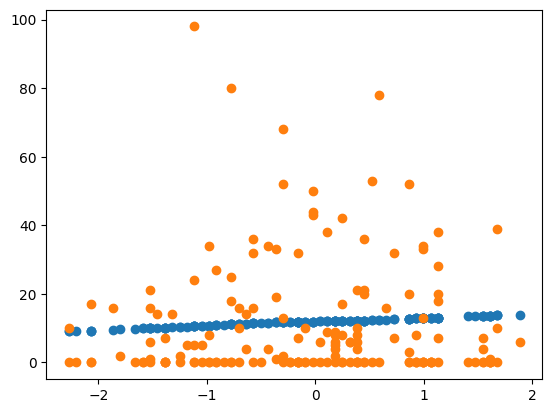

In [ ]:
# Turn on evaluation mode
model_v3.eval()

# Make predictions (inference)
with torch.inference_mode():
    y_preds = model_v3(X_test)


#plots predictions--remember, our model has never seen X_test
plt.scatter(X_test.detach().numpy(),y_preds.detach().numpy())

#plots test data
plt.scatter(X_test.detach().numpy(),y_test.detach().numpy())


AAHHHHHH. No insightful pattern in sight. Ok, the only solutions I can think of are getting new data or trying a different type of model completley. This computer lab situation is killing me. I think I am goiong to try multi variable models which I dont know how to do. Time to figure it out I guess. I'm paying the price for not looksing at my pairplot close enough.

**Version 4**

I am attempting a multi variable model (im so cooked, I dont know how to do this but I am too lazy to walk all the way back to the classroom  and ask for help)

In [ ]:
import torch
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Select features (height) and target (weight)
features = data['bpm']
target = data['in_spotify_charts']

# Scale the height using standardization
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features.values.reshape(-1, 1))

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    features_scaled, target, test_size=0.2, random_state=42
)

# Convert to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train.values, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test.values, dtype=torch.float32)

In [ ]:
import torch.nn as nn
import torch.optim as optim

# Define the model architecture
model_v4 = nn.Sequential(
    nn.Linear(1, 16),  # Input layer (1 feature) to hidden layer (16 neurons)
    nn.ReLU(),
    nn.Linear(16, 8),  # Hidden layer to another hidden layer
    nn.ReLU(),
    nn.Linear(8, 1)  # Hidden layer to output layer (1 output)
)

# Define the loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model_v4.parameters(), lr=0.001)

# Training loop
num_epochs = 1000
for epoch in range(num_epochs):
    # Forward pass
    outputs = model_v4(X_train)
    loss = criterion(outputs.squeeze(), y_train)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Save the trained model
torch.save(model_v4.state_dict(), 'weight_prediction_model.pth')

Epoch [100/1000], Loss: 481.4109
Epoch [200/1000], Loss: 424.1057
Epoch [300/1000], Loss: 370.6240
Epoch [400/1000], Loss: 362.0188
Epoch [500/1000], Loss: 359.6075
Epoch [600/1000], Loss: 358.1577
Epoch [700/1000], Loss: 357.3150
Epoch [800/1000], Loss: 356.8944
Epoch [900/1000], Loss: 356.6054
Epoch [1000/1000], Loss: 356.3785


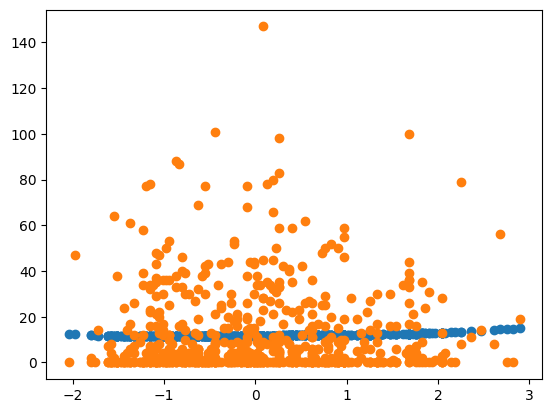

In [ ]:
plt.scatter(X_train,outputs.detach().numpy())
plt.scatter(X_train,y_train)

This might not look like much, but I think I am onto something. I am going to evaluate this model then find a new interation and make a similar model... I kknow that i said I would make a multi variable model, but let me exhaust this rabbit hole first...

In [ ]:

import torch
import torch.nn as nn
from sklearn.metrics import mean_squared_error, r2_score

# Load the saved model
model = nn.Sequential(
    nn.Linear(1, 16),
    nn.ReLU(),
    nn.Linear(16, 8),
    nn.ReLU(),
    nn.Linear(8, 1)
)
model.load_state_dict(torch.load('weight_prediction_model.pth'))
model.eval()

# Make predictions on the test set
with torch.no_grad():
    y_pred = model(X_test)
    y_pred = y_pred.squeeze()

# Calculate MSE and R-squared
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the results
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R^2): {r2}")

Mean Squared Error (MSE): 304.62821129540737
R-squared (R^2): 0.0008919632049531057


Oh my gosh, this isn't working at all. Im frazzled.

# **Conclusion**

Well, I am out of time. Biggest lesson learned, DATSET MATTERS: CHOOSE WITH CAUTION. I'm sad because I was pretty excited to actually use a nueral network and get one step closer to "real ai", but it kind of a flop because of my data. It sucks extra because this is my final.

Sad things aside!!! I do feel a lot more comfortable using these different techniques, and I am confident in my abilities to uncover trends in data. I really liked using the RelU, 1. becuase it made me feel smart and 2. because I liked how in control I was whilst also letting the model work its magic.

